In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', dayfirst=True)
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce', dayfirst=True)

In [5]:
df.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

In [6]:
df['Date'] = df['Start_Time'].dt.date
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month

In [7]:
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition'])

In [8]:
print(df[['Start_Time', 'End_Time', 'Date', 'Hour', 'Day_of_Week', 'Month']].head())

           Start_Time            End_Time        Date  Hour  Day_of_Week  \
0 2016-02-08 00:37:00 2016-02-08 06:37:00  2016-02-08     0            0   
1 2016-02-08 05:56:00 2016-02-08 11:56:00  2016-02-08     5            0   
2 2016-02-08 06:15:00 2016-02-08 12:15:00  2016-02-08     6            0   
3 2016-02-08 06:15:00 2016-02-08 12:15:00  2016-02-08     6            0   
4 2016-02-08 06:51:00 2016-02-08 12:51:00  2016-02-08     6            0   

   Month  
0      2  
1      2  
2      2  
3      2  
4      2  


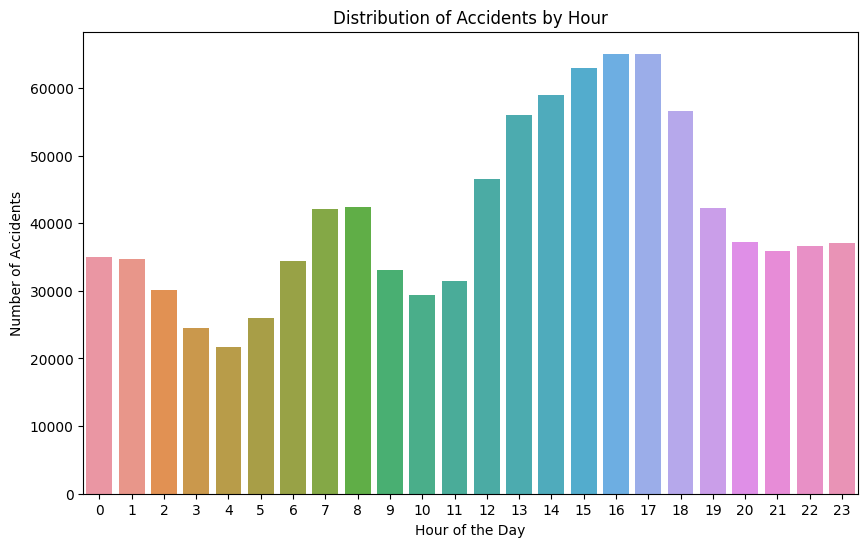

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

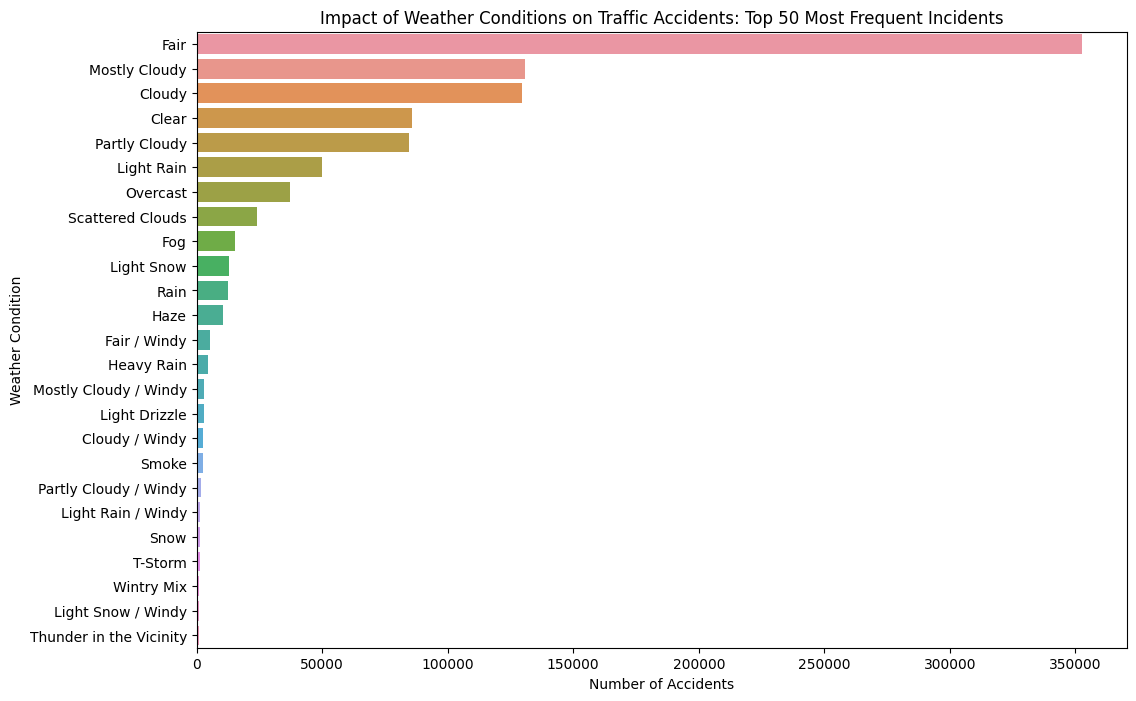

Weather_Condition
Fair                       352797
Mostly Cloudy              130867
Cloudy                     129518
Clear                       85601
Partly Cloudy               84428
Light Rain                  49972
Overcast                    37242
Scattered Clouds            23881
Fog                         15428
Light Snow                  12851
Rain                        12616
Haze                        10592
Fair / Windy                 5145
Heavy Rain                   4555
Mostly Cloudy / Windy        3033
Light Drizzle                2851
Cloudy / Windy               2671
Smoke                        2378
Partly Cloudy / Windy        1686
Light Rain / Windy           1522
Snow                         1518
T-Storm                      1150
Wintry Mix                   1091
Light Snow / Windy            985
Thunder in the Vicinity       870
Name: count, dtype: int64


In [10]:
top_50_weather_conditions = df['Weather_Condition'].value_counts().head(25)

plt.figure(figsize=(12, 8))
sns.countplot(y='Weather_Condition', data=df, order=top_50_weather_conditions.index)
plt.title('Impact of Weather Conditions on Traffic Accidents: Top 50 Most Frequent Incidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

print(top_50_weather_conditions)


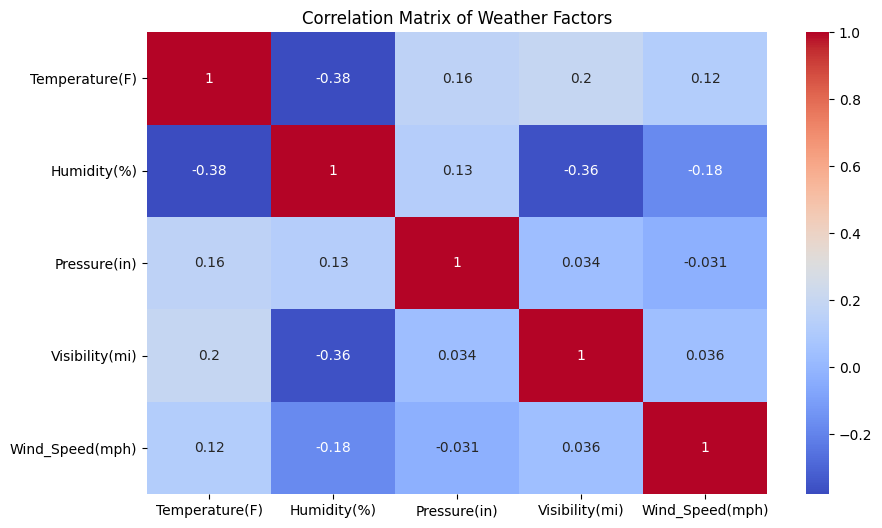

In [11]:
correlation = df[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Factors')
plt.show()

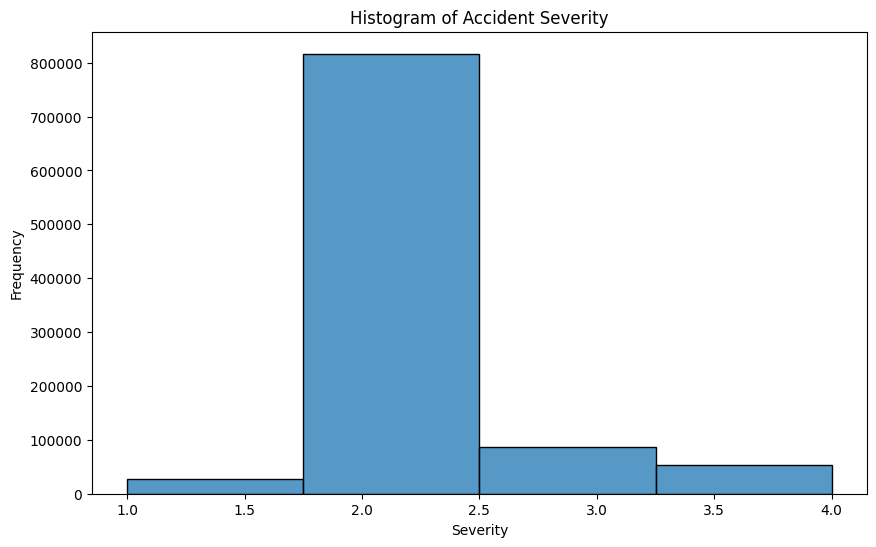

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Severity'], bins=4, kde=False)
plt.title('Histogram of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

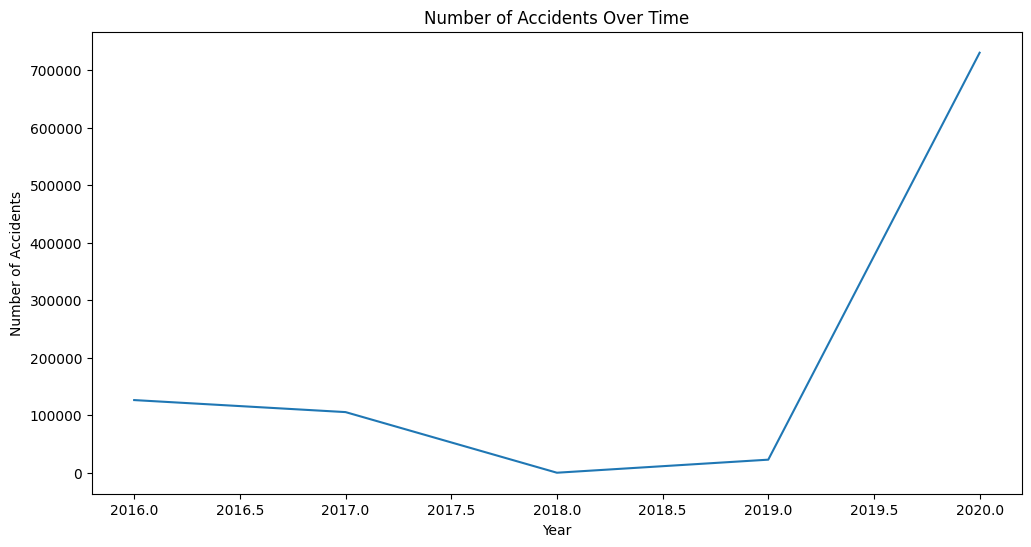

In [13]:
df['Year'] = df['Start_Time'].dt.year
accidents_per_year = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
accidents_per_year.plot(kind='line')
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

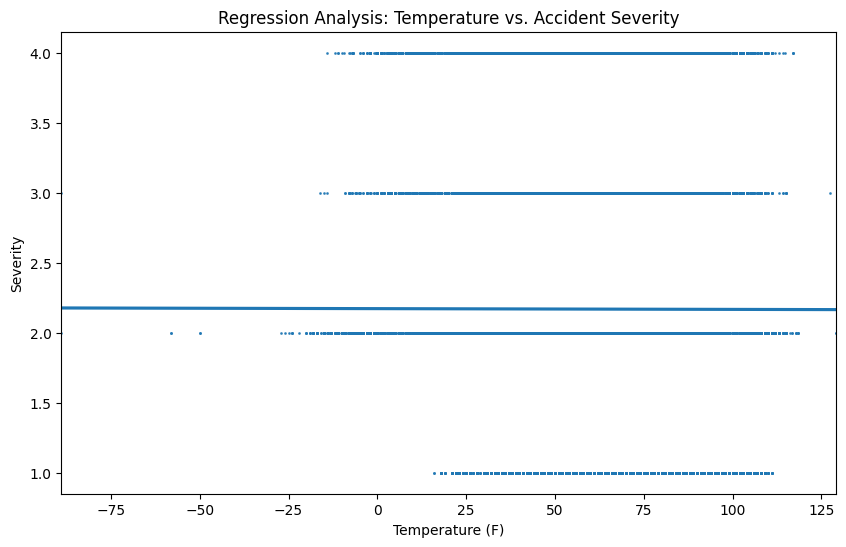

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature(F)', y='Severity', data=df, scatter_kws={'s':1})
plt.title('Regression Analysis: Temperature vs. Accident Severity')
plt.xlabel('Temperature (F)')
plt.ylabel('Severity')
plt.show()

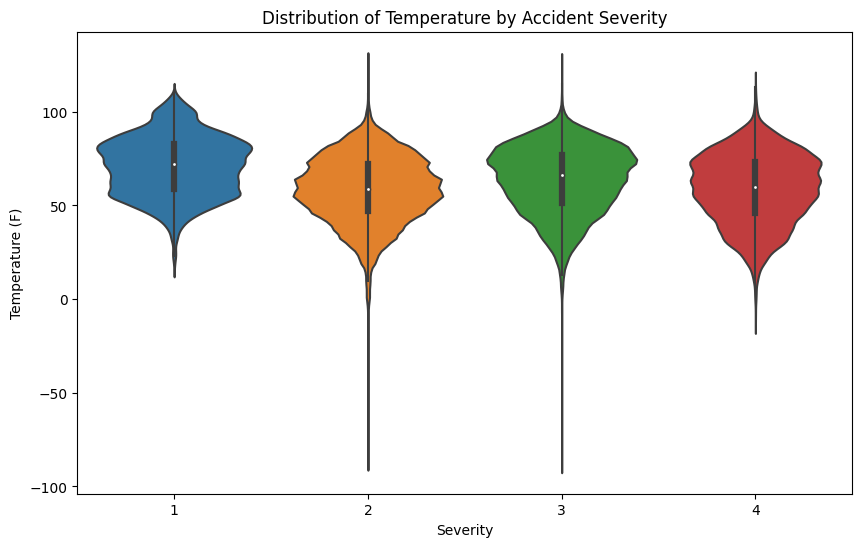

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Distribution of Temperature by Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Temperature (F)')
plt.show()

In [16]:
sample_df = df.sample(n=1000) 
attributes_to_compare = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']

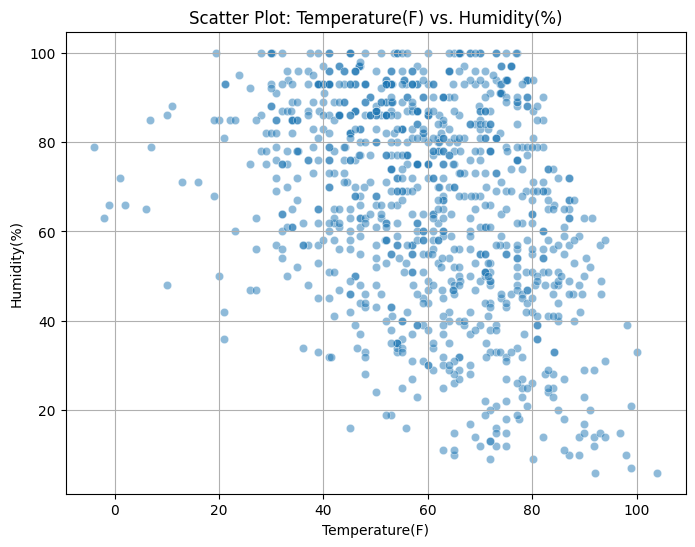

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attributes_to_compare[0], y=attributes_to_compare[1], data=sample_df, alpha=0.5)
plt.title(f'Scatter Plot: {attributes_to_compare[0]} vs. {attributes_to_compare[1]}')
plt.xlabel(attributes_to_compare[0])
plt.ylabel(attributes_to_compare[1])
plt.grid(True)
plt.show()

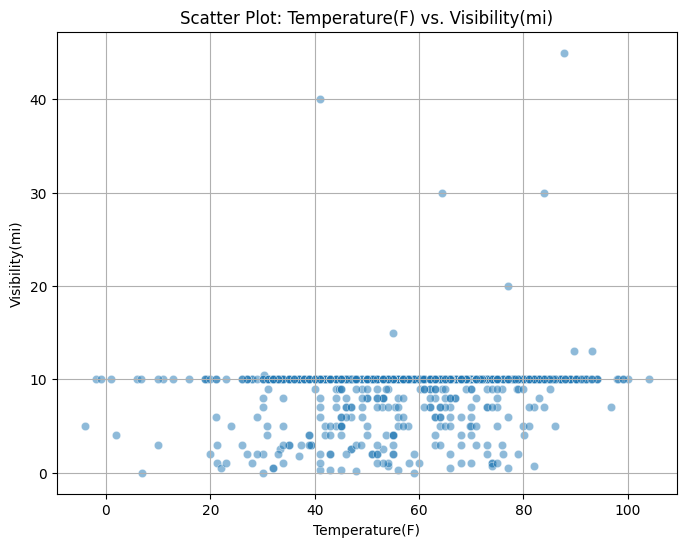

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attributes_to_compare[0], y=attributes_to_compare[2], data=sample_df, alpha=0.5)
plt.title(f'Scatter Plot: {attributes_to_compare[0]} vs. {attributes_to_compare[2]}')
plt.xlabel(attributes_to_compare[0])
plt.ylabel(attributes_to_compare[2])
plt.grid(True)
plt.show()

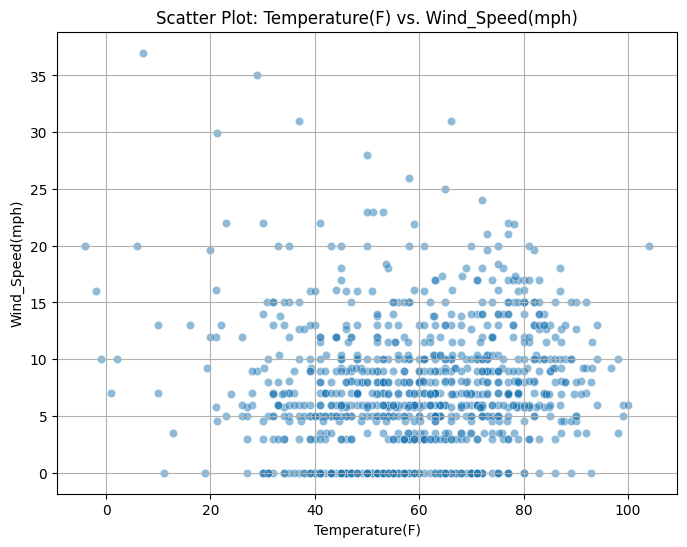

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attributes_to_compare[0], y=attributes_to_compare[3], data=sample_df, alpha=0.5)
plt.title(f'Scatter Plot: {attributes_to_compare[0]} vs. {attributes_to_compare[3]}')
plt.xlabel(attributes_to_compare[0])
plt.ylabel(attributes_to_compare[3])
plt.grid(True)
plt.show()

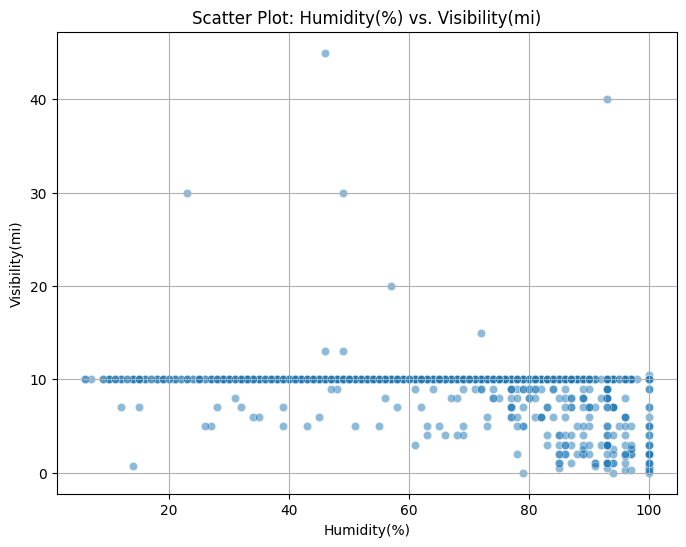

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attributes_to_compare[1], y=attributes_to_compare[2], data=sample_df, alpha=0.5)
plt.title(f'Scatter Plot: {attributes_to_compare[1]} vs. {attributes_to_compare[2]}')
plt.xlabel(attributes_to_compare[1])
plt.ylabel(attributes_to_compare[2])
plt.grid(True)
plt.show()

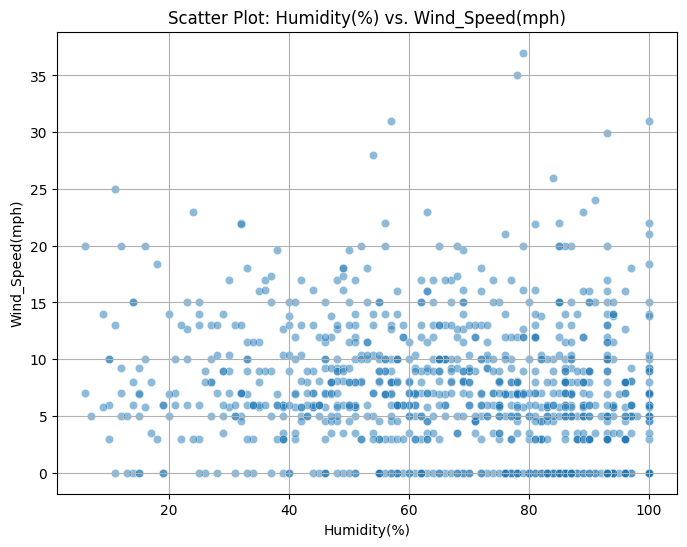

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attributes_to_compare[1], y=attributes_to_compare[3], data=sample_df, alpha=0.5)
plt.title(f'Scatter Plot: {attributes_to_compare[1]} vs. {attributes_to_compare[3]}')
plt.xlabel(attributes_to_compare[1])
plt.ylabel(attributes_to_compare[3])
plt.grid(True)
plt.show()

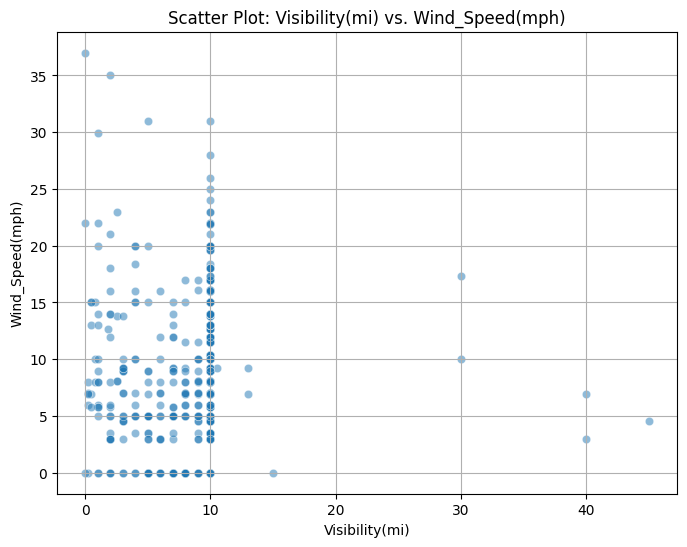

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attributes_to_compare[2], y=attributes_to_compare[3], data=sample_df, alpha=0.5)
plt.title(f'Scatter Plot: {attributes_to_compare[2]} vs. {attributes_to_compare[3]}')
plt.xlabel(attributes_to_compare[2])
plt.ylabel(attributes_to_compare[3])
plt.grid(True)
plt.show()